In [94]:
from db_update.db_connector import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
headlines_tuple = get_all_headlines()

headlines = []

for headline in headlines_tuple:
    headlines.append(headline[0])

In [50]:
text_no_repeats = []
for sent in headlines:
    if sent not in text_no_repeats:
        text_no_repeats.append(sent)
        
headlines = text_no_repeats

In [51]:
import string

In [52]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [53]:
punc = []
for i in string.punctuation:
    punc.append(i)
punc.append('’')
punc.append('‘')
punc

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 '’',
 '‘']

In [54]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer # or LancasterStemmer, RegexpStemmer, SnowballStemmer

default_stemmer = PorterStemmer()
default_stopwords = stopwords.words('english') # or any other list of your choice
def clean_text(text, ):

    def tokenize_text(text):
        return [w for s in sent_tokenize(text) for w in word_tokenize(s)]

    def remove_special_characters(text, characters=punc):
        letters = list(map(lambda x: x, text))
        return_letters = []
        for letter in letters:
            if letter not in characters:
                return_letters.append(letter)
        return ''.join(return_letters)

    def stem_text(text, stemmer=default_stemmer):
        tokens = tokenize_text(text)
        return ' '.join([stemmer.stem(t) for t in tokens])

    def remove_stopwords(text, stop_words=default_stopwords):
        tokens = [w for w in tokenize_text(text) if w not in stop_words]
        return ' '.join(tokens)

    text = text.strip(' ') # strip whitespaces
    text = text.lower() # lowercase
    text = stem_text(text) # stemming
    text = remove_special_characters(text) # remove punctuation and symbols
    text = remove_stopwords(text) # remove stopwords
    #text.strip(' ') # strip whitespaces again?

    return text

In [55]:
text_cleaned = list(map(lambda text: clean_text(text), headlines))

In [56]:
text_cleaned

['doctor offic charg patient administr task whi',
 'whi stock taken serious accord new bull',
 'stock fall tech ratecut doubt creep',
 'stock market today p 500 fall open bitcoin tread record',
 'dow fall 100 point wall street continu pull back record appl share slide',
 'morgan stanley wealthmanag unit key growth area analyst say',
 'shoprit add stock counter scant south africa invest',
 '65 high earner marriag claim husband social secur benefit befor',
 'biden like blame hi failur sen tom cotton',
 'politic fed realiti scott ladner',
 'british neobank monzo rais 430 million alphabetl round relaunch u',
 'p 500 futur dip ahead fed testimoni job report later week',
 'tech giant weigh stock befor econom data market wrap',
 'gold climb record momentum build rate bet',
 'argentina peso bond put balloon spur inflat risk',
 'target earn surg despit holiday sale dip see sale recoveri 2024',
 'nuclear renaiss upon us investor need know uranium',
 'tesla berlin factori halt extremist group cla

In [57]:
headlines

["Some doctor’s offices are charging patients for administrative tasks: Here's why",
 'Here’s why AT&T’s stock should be taken more seriously, according to a new bull',
 'Stocks fall as tech, rate-cut doubts creep in',
 'Stock Market Today: S&P 500 Falls at Open, Bitcoin Treads Below Record',
 'Dow falls 100 points as Wall Street continues to pull back from records, Apple shares slide',
 'Morgan Stanley’s wealth-management unit is a key growth area, analysts say',
 'Shoprite Adds Stock to Counter Scant South Africa Investment',
 'I’m 65 and the high earner in my marriage. Can I claim my husband’s Social Security benefits before my own?',
 'Biden likes to blame others ‘for his own failures’: Sen. Tom Cotton',
 "There's some politicization about the Fed in reality: Scott Ladner",
 'British neobank Monzo raises $430 million in Alphabet-led round to relaunch in the U.S.',
 'S&P 500 futures dip ahead of Fed testimony, jobs report later in week',
 'Tech Giants Weigh on Stocks Before Economic

In [58]:
cv = CountVectorizer()

In [59]:
x = cv.fit_transform(text_cleaned)
x = x.toarray()

In [60]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [61]:
sorted(cv.vocabulary_.keys())

['10',
 '100',
 '113',
 '116',
 '12',
 '128',
 '13',
 '14',
 '148',
 '15',
 '16',
 '164',
 '165',
 '16th',
 '178',
 '18',
 '20',
 '2008',
 '2009',
 '2018',
 '2021',
 '2022',
 '2023',
 '2024',
 '2025',
 '217000',
 '22',
 '222',
 '225',
 '227b',
 '258billion',
 '27',
 '275000',
 '2nd',
 '2year',
 '30',
 '300',
 '31',
 '33',
 '39',
 '40',
 '41',
 '430',
 '46',
 '48',
 '50',
 '500',
 '50th',
 '51',
 '515',
 '522',
 '525',
 '529',
 '611000',
 '63',
 '64b',
 '65',
 '674',
 '70',
 '75',
 '80',
 '8m',
 '96',
 '971',
 'abov',
 'absolut',
 'abu',
 'abuct',
 'accid',
 'accord',
 'account',
 'accus',
 'acquir',
 'act',
 'action',
 'activist',
 'ad',
 'add',
 'address',
 'adj',
 'administr',
 'adnoc',
 'advic',
 'advis',
 'africa',
 'african',
 'agenda',
 'ago',
 'agre',
 'ahead',
 'ai',
 'aid',
 'aim',
 'air',
 'airlin',
 'al',
 'albertson',
 'alivecor',
 'allstar',
 'almost',
 'alphabet',
 'alphabetl',
 'altman',
 'alzheim',
 'ambiti',
 'amc',
 'amer',
 'american',
 'amid',
 'amylyx',
 'analyst',

In [62]:
dbscan = DBSCAN()
dbscan.fit(x)

DBSCAN()

In [63]:
len(dbscan.labels_)

359

In [64]:
data_ = {"group": dbscan.labels_, "sentance" : headlines}
df = pd.DataFrame(data=data_)

In [65]:
df

,group,sentance
0,-1,Some doctor’s offices are charging patients fo...
1,-1,Here’s why AT&T’s stock should be taken more s...
2,-1,"Stocks fall as tech, rate-cut doubts creep in"
3,-1,"Stock Market Today: S&P 500 Falls at Open, Bit..."
4,-1,Dow falls 100 points as Wall Street continues ...
...,...,...
354,-1,"German industrial production expands 1%, more ..."
355,-1,"State of the Union: Biden targets drugs costs,..."
356,-1,State of the Union: Biden wants to raise the m...
357,-1,State of the Union: Biden touts slowing inflat...


In [66]:
df.sort_values(by='group', ascending=False).head(50)

,group,sentance
0,-1,Some doctor’s offices are charging patients fo...
225,-1,"UK House Prices Rise for a Fifth Month, Halifa..."
245,-1,Early stage trial of Novo Nordisk oral drug fi...
244,-1,Court has cleared path for vote on SPAC merger...
243,-1,Deutsche Bank says the bitcoin rally can conti...
242,-1,Kroger shares near 2-year high after earnings ...
241,-1,MarketWatch Live: Energy a factor as ECB infla...
240,-1,Weekly U.S. initial unemployment claims flat a...
239,-1,U.S. trade deficit widens more than 5% to its ...
238,-1,"Jobless claims stay at 217,000 in early March...."


In [67]:
from sklearn.neighbors import NearestNeighbors

In [68]:
neigh = NearestNeighbors(n_neighbors=2)

In [95]:
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

In [77]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

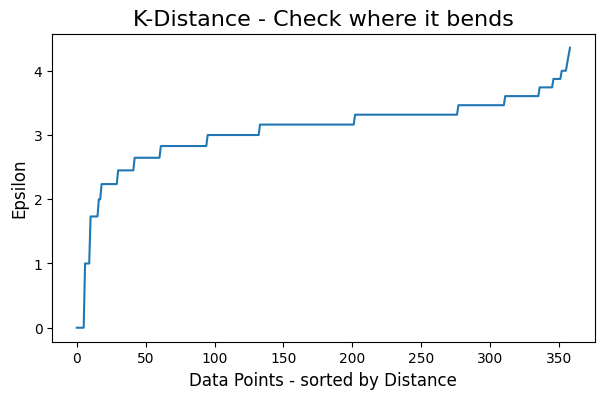

In [78]:
plt.figure(figsize=(7,4))
plt.plot(distances)
plt.title('K-Distance - Check where it bends',fontsize=16)
plt.xlabel('Data Points - sorted by Distance',fontsize=12)
plt.ylabel('Epsilon',fontsize=12)
plt.show()

In [91]:
dbscan_opt=DBSCAN(eps=2.5,min_samples=2)
dbscan_opt.fit(x)

DBSCAN(eps=2.5, min_samples=2)

In [92]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

DBSCAN_opt_labels
-1     317
 5       5
 15      4
 11      4
 8       3
 4       2
 3       2
 6       2
 7       2
 0       2
 9       2
 10      2
 2       2
 12      2
 13      2
 14      2
 1       2
 16      2
Name: count, dtype: int64

In [93]:
df.sort_values(by='DBSCAN_opt_labels', ascending=False).head(50)

,group,sentance,DBSCAN_opt_labels
266,-1,Here’s what 100 years of history shows about p...,16
275,-1,What 100 years of history shows about periods ...,16
283,-1,"US economy adds 275,000 jobs, unemployment rat...",15
263,-1,"U.S. economy adds 275,000 jobs, stronger than ...",15
348,-1,"February jobs report: US economy adds 275,000 ...",15
350,-1,"U.S. adds more-than-expected 275,000 jobs in F...",15
257,-1,VIEW Feb US payrolls show labor market healthy...,14
341,-1,Feb US payrolls show labor market healthy but ...,14
261,-1,Stock market today: US futures steady after jo...,13
253,-1,Stock market today: US futures rise after Febr...,13
